# Comparação de Modelos de Regressão

Este *notebook* demonstra o uso dos teste não-paramétricos de Friedman e de Nemenyi para comparar modelos em muitas bases de dados. Baseado no artigo [***Statistical Comparisons of Classifiers
over Multiple Data Sets***](https://jmlr.org/papers/volume7/demsar06a/demsar06a.pdf) de Janez Demsar.

Para executá-los usa-se o *framework* [Autorank](https://sherbold.github.io/autorank/) que automatiza o processo de avaliação de métodos.

## Carregando Bibliotecas

O experimento utiliza, além de Autorank, Pandas e Scikit-Learn para execução.

In [ ]:
!pip install autorank

  Preparing metadata (setup.py) ... done
  Created wheel for baycomp: filename=baycomp-1.0.3-py3-none-any.whl size=18027 sha256=aee4148029f3b2e947133ba558111b8c1ba434b8d561c224368b381203c4b758
  Stored in directory: /root/.cache/pip/wheels/2b/a2/b8/9c0b9ffde746a4e0c20639b46eae34dda4e0588efebde8916e
Successfully built baycomp


In [ ]:
import pandas as pd


from autorank import autorank


from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection  import RandomizedSearchCV
from sklearn.pipeline import Pipeline

## Datasets

Foram escolhidos dois *datasets* para a demonstração, todos estão presentes no site do Scikit-Learn. Todos foram separados em conjuntos de treino e de teste nas proporções 75%-25%, respectivamente.

In [ ]:
from sklearn.datasets import load_diabetes, fetch_california_housing

In [ ]:
diabetes = load_diabetes()

X_diabetes = diabetes.data
y_diabetes = diabetes.target
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes, y_diabetes, random_state=0)

california = fetch_california_housing()
X_california = california.data
y_california = california.target
X_train_california, X_test_california, y_train_california, y_test_california = train_test_split(X_california, y_california, random_state=0)


In [ ]:
X_data = {
          'diabetes':[X_train_diabetes, y_train_diabetes, X_test_diabetes, y_test_diabetes],
          'california':[X_train_california, y_train_california, X_test_california, y_test_california]

          }

## Funçõe de Treino e de Teste

O experimento utiliza quatro modelos de aprendizagem de máquina: Multilayer Percetron (MLP), Support Vector Machine (SVM), Random Forest e Árvore de Decisão.

In [ ]:
def rf_function(x_train, y_train, x_test, y_test):



  RF_params = {'rf__n_estimators': [10,100,200],
             'rf__max_depth':[None, 2, 3, 4]
              }

  pipe = Pipeline([('scaler',MinMaxScaler()) ,('rf', RandomForestRegressor())])
  search = RandomizedSearchCV(pipe, RF_params, cv=3)
  search.fit(x_train, y_train)
  preds = search.predict(x_test)

  score = mean_squared_error(y_test, preds)

  return search.best_estimator_, preds, search.best_params_, score

In [ ]:
def svm_function(x_train, y_train, x_test, y_test):


  SVM_params =  {
                'svm__C': [0.1, 00.1, 000.1],
                'svm__kernel': ['linear', 'rbf']
                }

  pipe = Pipeline([('scaler',MinMaxScaler()) ,('svm', SVR())])
  search = RandomizedSearchCV(pipe, SVM_params, cv=3)
  search.fit(x_train, y_train)
  preds = search.predict(x_test)

  score = mean_squared_error(y_test, preds)

  return search.best_estimator_, preds, search.best_params_, score

In [ ]:
def mlp_function(x_train, y_train, x_test, y_test):


  MLP_params = {
              'mlp__hidden_layer_sizes': [(50,50,50)],
              'mlp__alpha': [0.0001, 0.05]
                }

  pipe = Pipeline([('scaler', MinMaxScaler()), ('mlp', MLPRegressor())])
  search = RandomizedSearchCV(pipe, MLP_params, cv=3)
  search.fit(x_train, y_train)
  preds = search.predict(x_test)

  score = mean_squared_error(y_test, preds)

  return search.best_estimator_, preds, search.best_params_, score

In [ ]:
def dt_function(x_train, y_train, x_test, y_test):

  DT_params = {
              'dt__max_depth': [2, 3, 5, 10],
              'dt__min_samples_split': [2, 3, 5],
                }

  pipe = Pipeline([('scaler', MinMaxScaler()), ('dt', DecisionTreeRegressor())])
  search = RandomizedSearchCV(pipe, DT_params, cv=3)
  search.fit(x_train, y_train)
  preds = search.predict(x_test)

  score = mean_squared_error(y_test, preds)

  return search.best_estimator_, preds, search.best_params_, score

In [ ]:
df_score = pd.DataFrame(columns=['dataset', 'rf','svm','mlp','dt'])

Os laços abaixo executam os experiemntos. O primeiro itera sobre a quantidade de experimentos por base de dados; o segundo, sobre as base de dados.

Cada linha representa um experimento.

In [ ]:
for i in range(3):

  for key, value in X_data.items():

    print("\U0001F680", key.upper(), i)

    x = value[0]
    y = value[1]
    x_test = value[2]
    y_test = value[3]

    rf_model, rf_preds, rf_params, rf_score = rf_function(x, y, x_test, y_test)
    svm_model, svm_preds, svm_params, svm_score = svm_function(x, y, x_test, y_test)
    mlp_model, mlp_preds, mlp_params, mlp_score = mlp_function(x, y, x_test, y_test)
    dt_model, dt_preds, dt_params, dt_score = dt_function(x, y, x_test, y_test)

    new_row = {'dataset':key+'-'+str(i), 'rf':rf_score, 'svm':svm_score, 'mlp':mlp_score , 'dt':dt_score}
    df_score = pd.concat([df_score, pd.DataFrame([new_row])], ignore_index=True)

    print(key.upper(), str(i), "\U00002705" )
    print()
    print("#################")








🚀 DIABETES 0


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer

DIABETES 0 ✅

#################
🚀 CALIFORNIA 0


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


CALIFORNIA 0 ✅

#################
🚀 DIABETES 1


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer

DIABETES 1 ✅

#################
🚀 CALIFORNIA 1


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer

CALIFORNIA 1 ✅

#################
🚀 DIABETES 2


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer

DIABETES 2 ✅

#################
🚀 CALIFORNIA 2


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


CALIFORNIA 2 ✅

#################


In [ ]:
df_score

,dataset,rf,svm,mlp,dt
0,diabetes-0,3603.980182,5060.834808,3067.385862,4533.663798
1,california-0,0.271815,0.498961,0.320867,0.422534
2,diabetes-1,3503.127810,5060.834808,2990.880994,4533.663798
3,california-1,0.272505,0.498961,0.306757,0.420216
4,diabetes-0,3512.172560,5060.834808,3085.658571,4533.663798
5,california-0,0.271318,0.498961,0.302387,0.431735
6,diabetes-1,3638.163873,5060.834808,3051.792358,4533.663798
7,california-1,0.270367,0.498961,0.302926,0.424121
8,diabetes-2,3614.579163,5060.834808,3031.530383,4533.663798
9,california-2,0.273809,0.498961,0.287081,0.425336


In [ ]:
from autorank import autorank, plot_stats, create_report, latex_table

In [ ]:
result = autorank(df_score.iloc[:,1:], alpha=0.05, verbose=False,order='ascending')
print(result)

RankResult(rankdf=
     meanrank       median          mad  ci_lower     ci_upper effect_size  \
rf        1.5  1751.700810  1751.429967  0.270367  3638.163873         0.0   
mlp       1.5  1495.600931  1495.306197  0.287081  3085.658571    0.106077   
dt        3.0  2267.047766  2266.616032  0.420216  4533.663798   -0.171613   
svm       4.0  2530.666884  2530.167923  0.498961  5060.834808   -0.241464   

      magnitude  
rf   negligible  
mlp  negligible  
dt   negligible  
svm       small  
pvalue=5.887355583577668e-06
cd=1.483221853685529
omnibus=friedman
posthoc=nemenyi
all_normal=False
pvals_shapiro=[np.float64(0.00036236457310408215), np.float64(0.0002539677634216995), np.float64(0.0002539627375607894), np.float64(0.00032789659440061574)]
homoscedastic=False
pval_homogeneity=2.303418633856274e-39
homogeneity_test=levene
alpha=0.05
alpha_normality=0.0125
num_samples=10
posterior_matrix=
None
decision_matrix=
None
rope=None
rope_mode=None
effect_size=akinshin_gamma
force_mode=Non

In [ ]:
print(create_report(result))

The statistical analysis was conducted for 4 populations with 10 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the populations rf (p=0.000), mlp (p=0.000), dt (p=0.000), and svm (p=0.000). Therefore, we assume that not all populations are normal.
Because we have more than two populations and the populations and some of them are not normal, we use the non-parametric Friedman test as omnibus test to determine if there are any significant differences between the median values of the populations. We use the post-hoc Nemenyi test to infer which differences are significant. We report the median (MD), the median absolute deviation (MAD) and the mean rank (MR) among all populations over the samples. Differences between populations are significant, if the difference of the mean rank is greater than the critical distance CD=1.483 of the Nemenyi test.
We reject the null hypothesis (p=0.000) of the 

<Axes: >

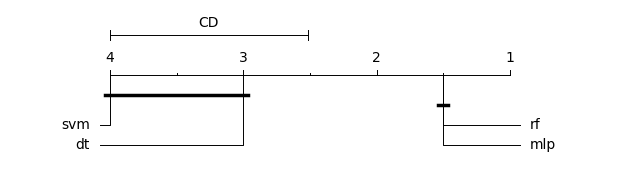

In [ ]:
plot_stats(result)